## Census Income Prediction

Use this [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/adult) of census income information to predict whether an adult annual income is over 50K or not.

The data comes originally from census bureau database in 1996. Initially it was named as "adult.data" and "adult.test" in text file spearately, and on a (2/3, 1/3) random train-test split.

After downloaded, changed its name to "income_data.txt" and "income_test.txt" and will combine train set and test test into whole dataset for prediction and analysis.

It consists of the following variables:

 1.   age: continuous.
 2.   workclass: categorical (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,   Without-pay, Never-worked.)
 3.   fnlwgt: continuous.
 4.   education: categorical (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
 5.   education-num: continuous.
 6.   marital-status: categorical (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.)
 7.   occupation: categorical (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.)
 8.   relationship: categorical (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.)
 9.   race: categorical (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.)
 10.   sex: categorical (Female, Male.)
 11.   capital-gain: continuous.
 12.   capital-loss: continuous.
 13.   hours-per-week: continuous.
 14.   native-country: categorical (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.)
 15.   class: categorical (>50K, <=50K)

### 1.  Importing the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
income_data = pd.read_table('income_data.txt', names=['age','workclass','fnlwgt','education','education-num',\
                                                      'marital-status','occupation','relationship','race','sex',\
                                                     'capital-gain','capital-loss','hours-per-week','native-country',\
                                                     'class'], index_col=False, sep=',', header=None, encoding='utf-8')
income_test = pd.read_table('income_test.txt', names=['age','workclass','fnlwgt','education','education-num',\
                                                      'marital-status','occupation','relationship','race','sex',\
                                                     'capital-gain','capital-loss','hours-per-week','native-country',\
                                                     'class'], index_col=False, sep=',', header=None, encoding='utf-8')
income_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
income_test.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [4]:
print(income_data.shape,income_test.shape)

(32561, 15) (16281, 15)


In [5]:
# Combine initially splited train and test dataset into one dataset:
data = pd.concat([income_data, income_test], ignore_index=True, sort=False)
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(48842, 15)

In [7]:
# Write back into CSV file to eliminate some original data writing format(s) from text file.
data.to_csv("census_income.csv",index=False)

As the encounted technical difficulties of changing data values from original dataset of "census_income.csv" by means of mapping, replacing, etc. in python. The following will read CSV data from a modified dataset named "census_income_modified.csv"

In [8]:
data = pd.read_csv("census_income_modified.csv")
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [9]:
data.shape

(45222, 15)

In [10]:
# Check missing value:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

### 2.  Data exploration - Exploratory Data Analysis (EDA)

In [11]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  class           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [13]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data['workclass'].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [15]:
data['education'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

In [16]:
data['marital-status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital-status, dtype: int64

In [17]:
data['occupation'].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [18]:
data['relationship'].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1349
Name: relationship, dtype: int64

In [19]:
data['race'].value_counts()

 White                 38903
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [20]:
data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

In [21]:
data['native-country'].value_counts()

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 India                           147
 El-Salvador                     147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [22]:
data['class'].value_counts()

 <=50K    34014
 >50K     11208
Name: class, dtype: int64

It shows that there is no missing value and/or unknown value from this dataset.

### 3.  Data manipulation / Feature Engineering

In [23]:
# Add new predictor varaible called "age_range" to group continuous value from initial "age" variable;
bins = [0, 18, 35, 65, np.inf]
names = ['<18', '18-35', '35-65', '65+']
data['age_range'] = pd.cut(data['age'], bins, labels=names)

In [24]:
data['age_range'].value_counts()

35-65    23363
18-35    19327
65+       1344
<18       1188
Name: age_range, dtype: int64

In [25]:
# Create dummy variables "<=50K" and ">50K" for initial column "class";
class_dummy = pd.get_dummies(data['class'])
df = pd.concat([data,class_dummy], axis=1)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_range,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,35-65,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,35-65,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,35-65,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,35-65,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,18-35,1,0


### 4.  Data Visualization - Exploratory Data Analysis (EDA)

##### -- Histogram

In [26]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class', 'age_range', ' <=50K', ' >50K'],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


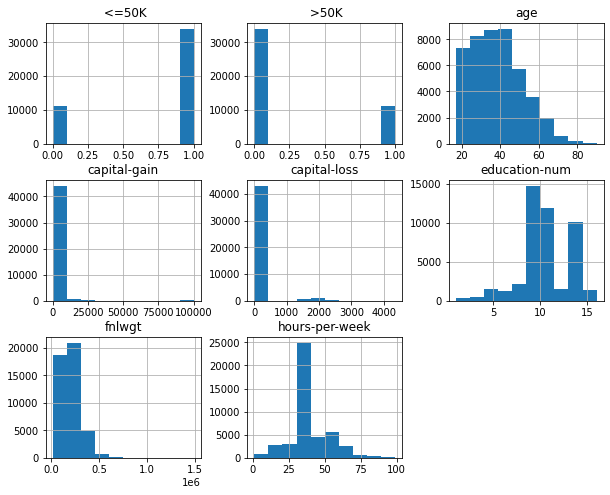

In [27]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Text(0.5, 1.0, 'Histogram')

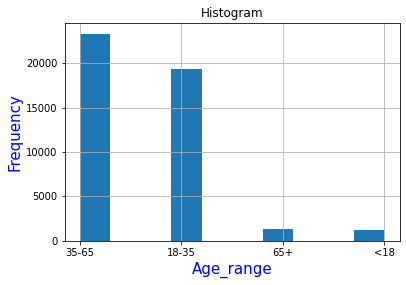

In [28]:
plt.figure(figsize=[6,4])

df['age_range'].hist(bins=10)
plt.xlabel("Age_range",fontsize=15,color='b')
plt.ylabel('Frequency',fontsize=15,color='b')
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

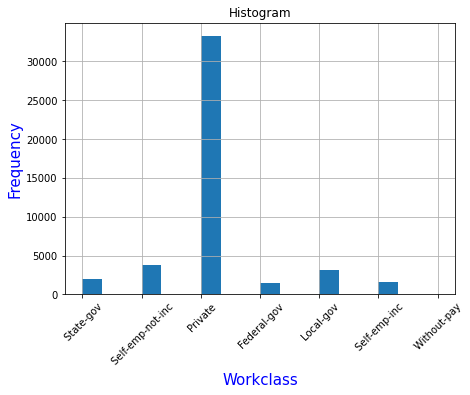

In [29]:
plt.figure(figsize=[7,5])

df['workclass'].hist(bins=18)
plt.xlabel("Workclass",fontsize=15,color='b')
plt.ylabel('Frequency',fontsize=15,color='b')
plt.xticks(rotation=45)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

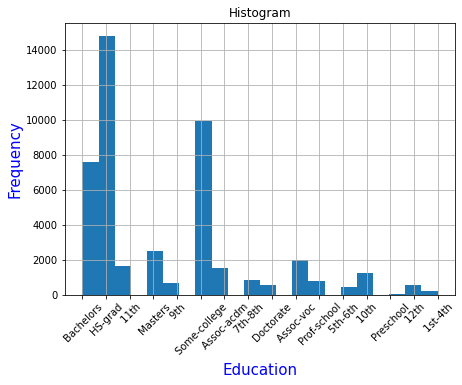

In [30]:
plt.figure(figsize=[7,5])

df['education'].hist(bins=22)
plt.xlabel("Education",fontsize=15,color='b')
plt.ylabel('Frequency',fontsize=15,color='b')
plt.xticks(rotation=45)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

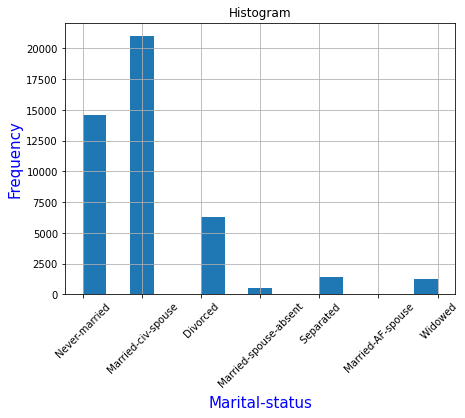

In [31]:
plt.figure(figsize=[7,5])

df['marital-status'].hist(bins=15)
plt.xlabel("Marital-status",fontsize=15,color='b')
plt.ylabel('Frequency',fontsize=15,color='b')
plt.xticks(rotation=45)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

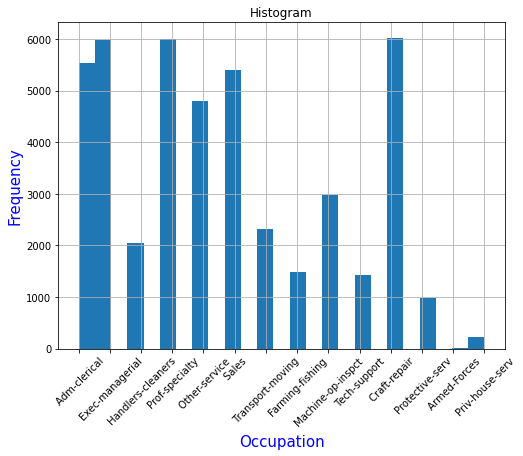

In [32]:
plt.figure(figsize=[8,6])

df['occupation'].hist(bins=25)
plt.xlabel("Occupation",fontsize=15,color='b')
plt.ylabel('Frequency',fontsize=15,color='b')
plt.xticks(rotation=45)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

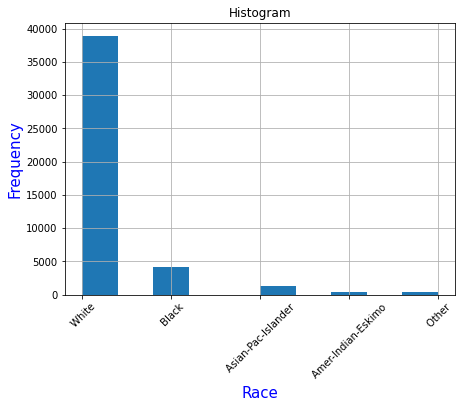

In [33]:
plt.figure(figsize=[7,5])

df['race'].hist(bins=10)
plt.xlabel("Race",fontsize=15,color='b')
plt.ylabel('Frequency',fontsize=15,color='b')
plt.xticks(rotation=45)
plt.title("Histogram")

##### -- Boxplot

Text(0.5, 1.0, 'Boxplot: Age')

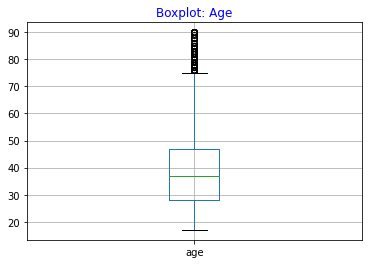

In [34]:
df.boxplot(column='age')
plt.title("Boxplot: Age",color='b')

Text(0.5, 1.0, 'Boxplot: Education-num')

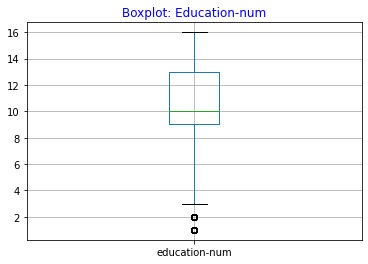

In [35]:
df.boxplot(column='education-num')    
plt.title("Boxplot: Education-num",color='b')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

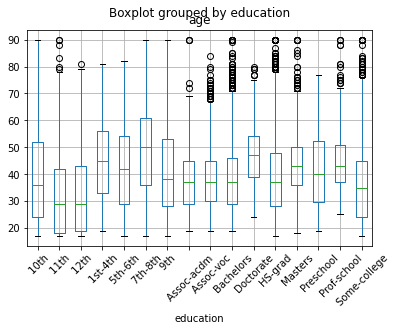

In [36]:
df.boxplot(column='age', by = 'education')
plt.xticks(rotation=45)

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

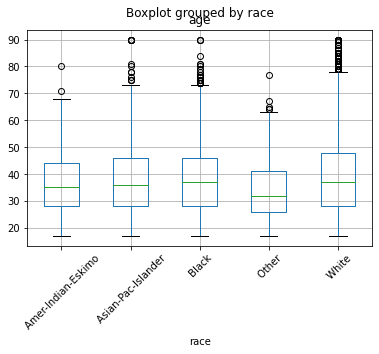

In [37]:
df.boxplot(column='age', by = 'race')
plt.xticks(rotation=45)

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

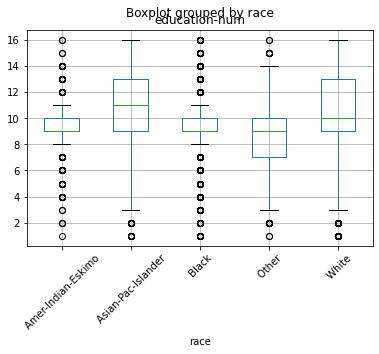

In [38]:
df.boxplot(column='education-num', by = 'race')
plt.xticks(rotation=45)

This shows race of "Asian-Pac-Islander" and "white" are relatively having Higher education than other races from such data population.

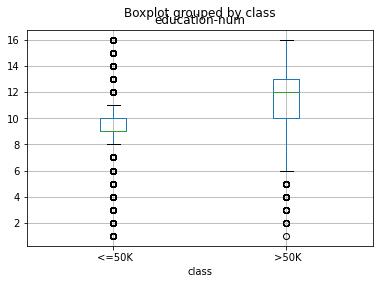

In [39]:
df.boxplot(column='education-num', by = 'class')

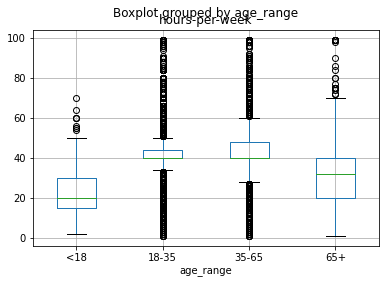

In [40]:
df.boxplot(column='hours-per-week', by = 'age_range')

##### -- Bar Chart

- age_range vs class

Text(0.5, 1.0, 'Income Class Distribution across Age Range')

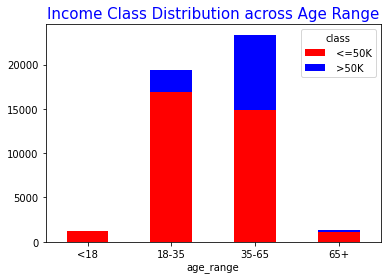

In [41]:
t1 = pd.crosstab(df['age_range'], df['class'])
t1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.xticks(rotation=0)
plt.title("Income Class Distribution across Age Range", color='b', fontsize=15)

- age_range vs class + sex

Text(0.5, 1.0, 'Income Class and Gender Distribution across Age Range')

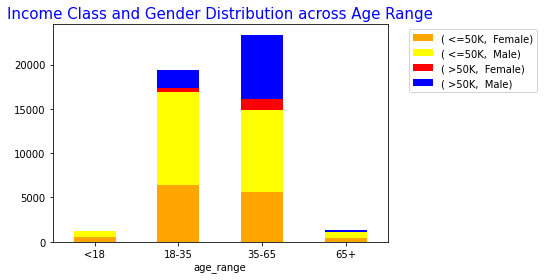

In [42]:
t2 = pd.crosstab(df['age_range'], [df['class'],df['sex']])
t2.plot(kind='bar', stacked=True, color=['orange','yellow','red','blue'], grid=False)
plt.legend(loc="upper left")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Income Class and Gender Distribution across Age Range", color='b', fontsize=15)

- race vs class

Text(0.5, 1.0, 'Income Class Distribution across Race')

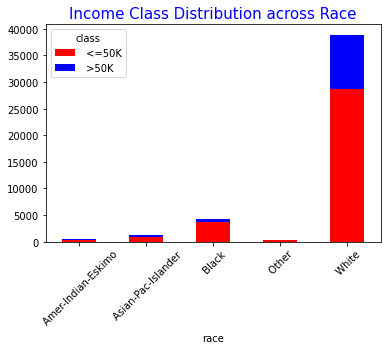

In [43]:
t3 = pd.crosstab(df['race'], df['class'])
t3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.xticks(rotation=45)
plt.title("Income Class Distribution across Race", color='b', fontsize=15)

- race vs class + sex

Text(0.5, 1.0, 'Income Class and Gender Distribution across Race')

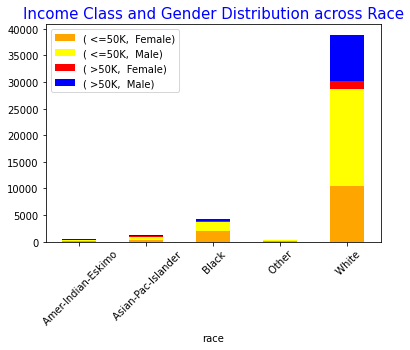

In [44]:
t4 = pd.crosstab(df['race'], [df['class'],df['sex']])
t4.plot(kind='bar', stacked=True, color=['orange','yellow','red','blue'], grid=False)
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title("Income Class and Gender Distribution across Race", color='b', fontsize=15)

- class vs race

Text(0.5, 1.0, 'Race Distribution across Income Class')

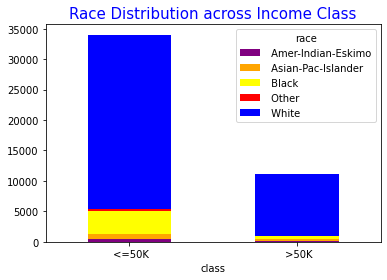

In [45]:
t5 = pd.crosstab(df['class'], df['race'])
t5.plot(kind='bar', stacked=True, color=['purple','orange','yellow','red','blue'], grid=False)
plt.xticks(rotation=0)
plt.title("Race Distribution across Income Class", color='b', fontsize=15)

- class vs race + sex

Text(0.5, 1.0, 'Race and Gender Distribution across Income Class')

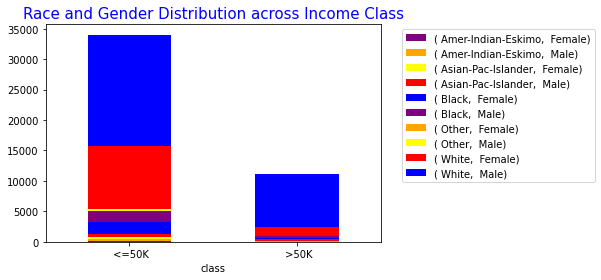

In [46]:
t6 = pd.crosstab(df['class'], [df['race'],df['sex']])
t6.plot(kind='bar', stacked=True, color=['purple','orange','yellow','red','blue'], grid=False)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Race and Gender Distribution across Income Class", color='b', fontsize=15)

Text(0.5, 1.0, 'Occupation Distribution across Income Class')

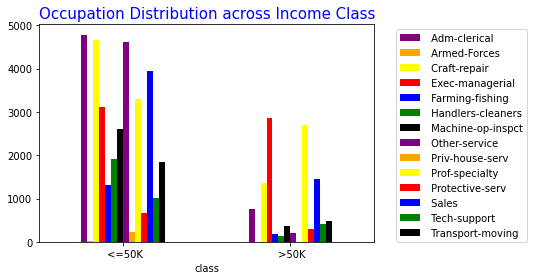

In [47]:
t7 = pd.crosstab(df['class'],df['occupation'])
t7.plot(kind='bar', stacked=False, color=['purple','orange','yellow','red','blue','green','black'], grid=False)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Occupation Distribution across Income Class", color='b', fontsize=15)

Text(0.5, 1.0, "Education Distribution within Income Class '>50K'")

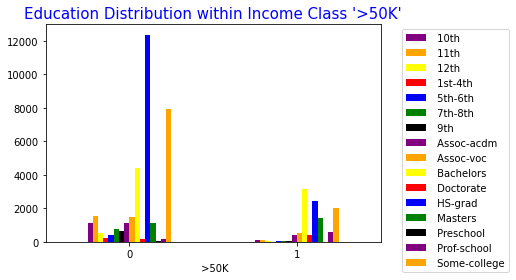

In [48]:
t8 = pd.crosstab(df[' >50K'],df['education'])
t8.plot(kind='bar', stacked=False, color=['purple','orange','yellow','red','blue','green','black'], grid=False)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Education Distribution within Income Class '>50K'", color='b', fontsize=15)

##### -- Pie Chart

In [49]:
# Get Top 5 occupation list which are more likely to make high income of ">50K" per annum
top_5_occupation = df.loc[df['class'] == ' >50K','occupation'].value_counts().iloc[:5]
top5_occupation = top_5_occupation.to_frame().reset_index()

In [50]:
top5_occupation = top5_occupation.rename(columns = {'index':'Top_5_Occupation'})
top5_occupation

,Top_5_Occupation,occupation
0,Exec-managerial,2867
1,Prof-specialty,2704
2,Sales,1455
3,Craft-repair,1355
4,Adm-clerical,756


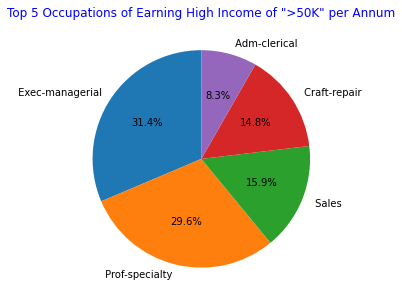

In [51]:
plt.figure(figsize=[7,5])
plt.pie(top5_occupation.occupation, labels=top5_occupation.Top_5_Occupation, startangle=90, autopct='%.1f%%')
plt.title('Top 5 Occupations of Earning High Income of ">50K" per Annum',color='blue')
plt.show()

In [52]:
# Get Top 5 education list which are more likely to make high income of ">50K" per annum
top_5_education = df.loc[df['class'] == ' >50K','education'].value_counts().iloc[:5]
top5_education = top_5_education.to_frame().reset_index()
top5_education = top5_education.rename(columns = {'index':'Top_5_Education'})

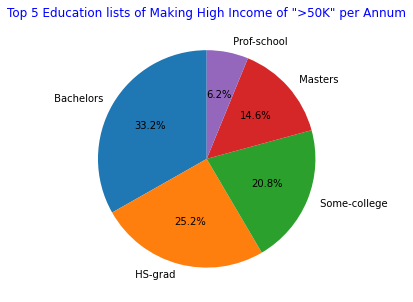

In [53]:
plt.figure(figsize=[7,5])
plt.pie(top5_education.education, labels=top5_education.Top_5_Education, startangle=90, autopct='%.1f%%')
plt.title('Top 5 Education lists of Making High Income of ">50K" per Annum',color='blue')
plt.show()

##### -- Scatter Plot

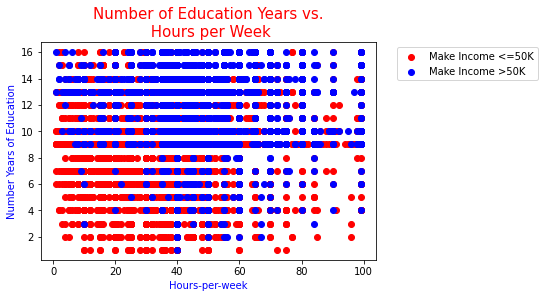

In [54]:
# Number of education years vs Hours-per-week for different income group;
plt.scatter(df.loc[(df['class']==" <=50K"), 'hours-per-week'],
            df.loc[(df['class']==" <=50K"), 'education-num'],
            color = 'red',
            label = 'Make Income <=50K')

plt.scatter(df.loc[(df['class']==" >50K"), 'hours-per-week'],
            df.loc[(df['class']==" >50K"), 'education-num'],
            color = 'blue',
            label = 'Make Income >50K')

plt.xlabel('Hours-per-week',color='blue')
plt.ylabel('Number Years of Education',color='blue')
plt.title('Number of Education Years vs.\n Hours per Week',
          fontsize = 15, color = 'red')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

##### -- Seaborn Heat Map

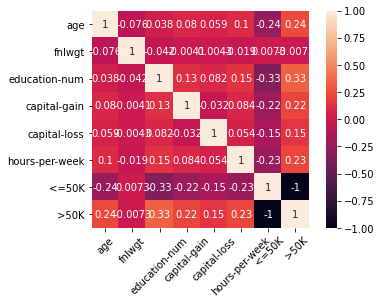

In [55]:
corrs = df.corr()
plt.plot(figsize=(16,12))
sns.heatmap(corrs, square=True, annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

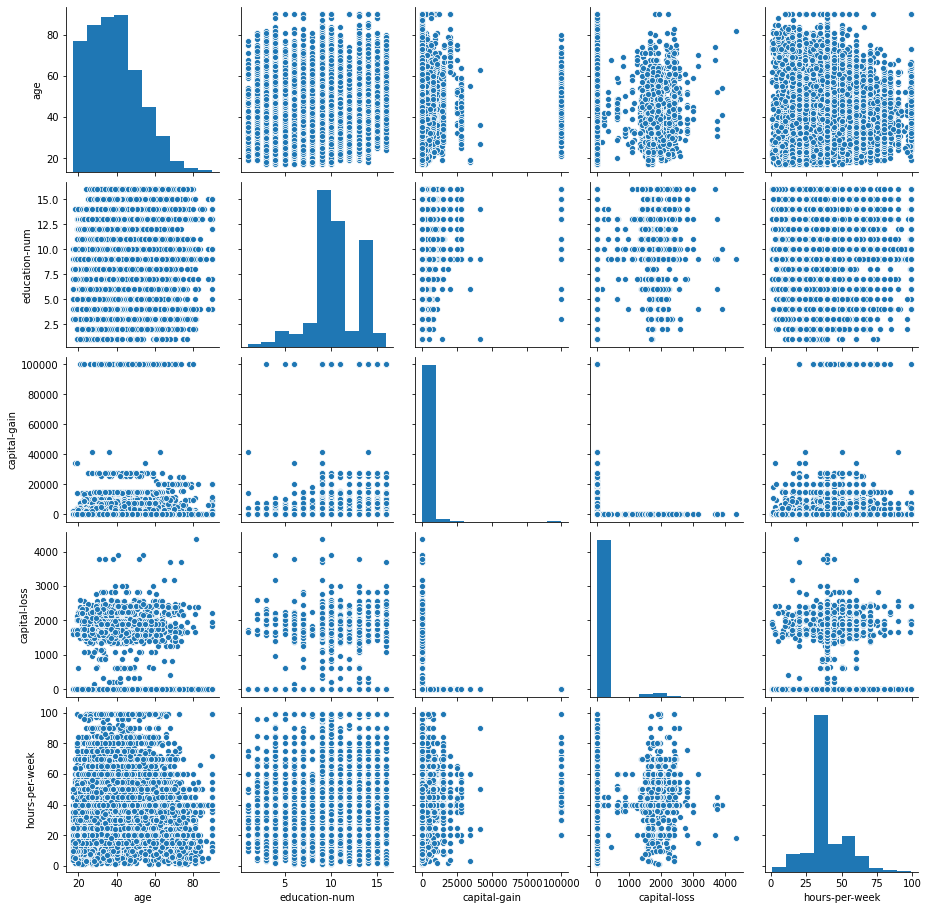

In [56]:
# Create dummy for make income >50K vs <=50K
df['class_dummy'] = np.where(df['class'] ==" >50K", 1, 0)

# Now use the class as a hue into some plots
sns.pairplot(df.loc[df['class'].isnull() == False,
                          ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
plt.show()

#### - Frequency of Income Class and Probability of within High Income Class for each Age Range group

##### -- Boxplot for Age_Range

In [57]:
temp1 = df['age_range'].value_counts(ascending=True)
temp2 = df.pivot_table(values='class',index=['age_range'],aggfunc=lambda x: x.map({' >50K':1,' <=50K':0}).mean())
print ('Frequency Table for Age_Range:')
print (temp1)

print ('\nProbability of making High Income of >50K for each Age Range group:')
print (temp2)

Frequency Table for Age_Range:
<18       1188
65+       1344
18-35    19327
35-65    23363
Name: age_range, dtype: int64

Probability of making High Income of >50K for each Age Range group:
              class
age_range          
<18        0.000000
18-35      0.127956
35-65      0.361383
65+        0.217262


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

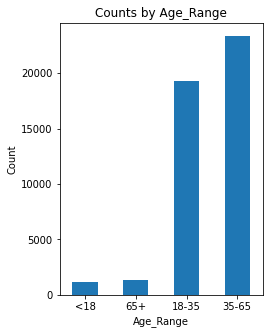

In [58]:
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Age_Range')
ax1.set_ylabel('Count')
ax1.set_title('Counts by Age_Range')
temp1.plot(kind='bar')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Probability of making High Income of >50K by Age Range')

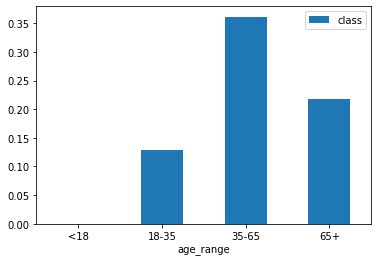

In [59]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
plt.xticks(rotation=0)
ax2.set_xlabel('Age_Range')
ax2.set_ylabel('Probability of making High Income of >50K')
ax2.set_title('Probability of making High Income of >50K by Age Range')

This shows the Age_Range of "35-65" group is more likely to make High Income of more than 50K a year which makes sense in real life.

#### - Frequency of Income Class and Probability of within High Income Class for each Gender group

##### -- Boxplot for Gender

In [60]:
temp3 = df['sex'].value_counts(ascending=True)
temp4 = data.pivot_table(values='class',index=['sex'],aggfunc=lambda x: x.map({' >50K':1,' <=50K':0}).mean())
print ('Frequency Table for Gender:')
print (temp3)

print ('\nProbability of making High Income of >50K for each Gender group:')
print (temp4)

Frequency Table for Gender:
 Female    14695
 Male      30527
Name: sex, dtype: int64

Probability of making High Income of >50K for each Gender group:
            class
sex              
 Female  0.113576
 Male    0.312477


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

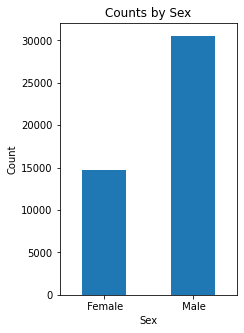

In [61]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.set_title('Counts by Sex')
temp3.plot(kind='bar')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Probability of making High Income of >50K by Sex')

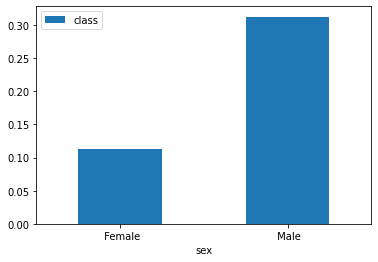

In [62]:
ax2 = fig.add_subplot(122)
temp4.plot(kind = 'bar')
plt.xticks(rotation=0)
ax2.set_xlabel('Sex')
ax2.set_ylabel('Probability of making High Income of >50K')
ax2.set_title('Probability of making High Income of >50K by Sex')

Here it shows Male are twice more than Female in making High Income of more than 50K a year both in ratio and counts calculation.

#### - Frequency of Income Class and Probability of within High Income Class for each Race group

##### -- Boxplot for Race

In [63]:
temp5 = df['race'].value_counts(ascending=True)
temp6 = data.pivot_table(values='class',index=['race'],aggfunc=lambda x: x.map({' >50K':1,' <=50K':0}).mean())
print ('Frequency Table for Race:')
print (temp5)

print ('\nProbability of making High Income of >50K for each Race group:')
print (temp6)

Frequency Table for Race:
 Other                   353
 Amer-Indian-Eskimo      435
 Asian-Pac-Islander     1303
 Black                  4228
 White                 38903
Name: race, dtype: int64

Probability of making High Income of >50K for each Race group:
                        class
race                         
 Amer-Indian-Eskimo  0.121839
 Asian-Pac-Islander  0.283193
 Black               0.126301
 Other               0.127479
 White               0.262371


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

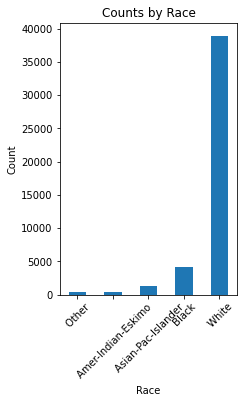

In [64]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Race')
ax1.set_ylabel('Count')
ax1.set_title('Counts by Race')
temp5.plot(kind='bar')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Probability of making High Income of >50K by Race')

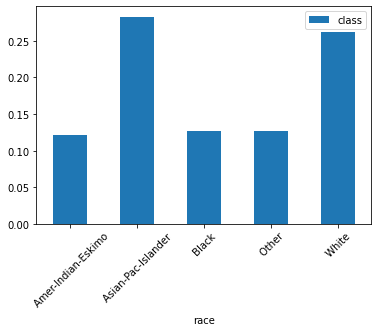

In [65]:
ax2 = fig.add_subplot(122)
temp6.plot(kind = 'bar')
plt.xticks(rotation=45)
ax2.set_xlabel('Race')
ax2.set_ylabel('Probability of making High Income of >50K')
ax2.set_title('Probability of making High Income of >50K by Race')

Here it shows in Number Counts, White people group is significantly higher than the other races in making High Income of >50K a year; \
However, when comparing the probability ratio of making High Income of >50K, Asian is equally as the White race people and slightly over that

### 5.  Feature Engineering before Modeling

In [66]:
# Drop duplicate or highly-correlated columns which were used for previous EDA process, they are "age", "<=50K", ">50K" and "class_dummy";
df1 = df.drop(['age',' <=50K',' >50K','class_dummy'], axis=1)
df1.head(3)

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,age_range
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,35-65
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,35-65
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,35-65


#### Label Encoding / One Hot Encoding

-- Label Encoding: Encode categorical features using an ordinal encoding scheme.\
-- One Hot Encoding: Encode categorical features as a one-hot numeric array.

- Here we will apply Lable Encoding to target variable - "class" as the transformed numeric values will have some hierarchy meaning;\
- And apply One Hot Encoding to the other 9 nominal X categorical varaibles, i.e. "workclass","education","marital-status","occupation",\
  "relationship","race","sex","native-country","age_range"

(1) Apply One Hot Encoding to 9 X variables - "workclass","education","marital-status","occupation","relationship","race","sex", "native-country" and "age_range" using Sci-Kit learn library approach;

In [67]:
# One-Hot-Encoding for "workclass";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['workclass']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["workclass_"+str(int(i)) for i in range(len(df1['workclass'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "workclass" column 
df1= df1.drop(['workclass'], axis=1) 
#df1.head(3)

In [68]:
# One-Hot-Encoding for "education";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['education']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["education_"+str(int(i)) for i in range(len(df1['education'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['education'], axis=1) 
#df1.head(3)

In [69]:
# One-Hot-Encoding for "marital-status";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['marital-status']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["marital-status_"+str(int(i)) for i in range(len(df1['marital-status'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['marital-status'], axis=1) 
#df1.head(3)

In [70]:
# One-Hot-Encoding for "occupation";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['occupation']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["occupation_"+str(int(i)) for i in range(len(df1['occupation'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['occupation'], axis=1) 
#df1.head(3)

In [71]:
# One-Hot-Encoding for "relationship";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['relationship']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["relationship_"+str(int(i)) for i in range(len(df1['relationship'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['relationship'], axis=1) 
#df1.head(3)

In [72]:
# One-Hot-Encoding for "race";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['race']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["race_"+str(int(i)) for i in range(len(df1['race'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['race'], axis=1) 
#df1.head(3)

In [73]:
# One-Hot-Encoding for "sex";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['sex']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["sex_"+str(int(i)) for i in range(len(df1['sex'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['sex'], axis=1) 
#df1.head(3)

In [74]:
# One-Hot-Encoding for "native-country";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['native-country']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["native-country_"+str(int(i)) for i in range(len(df1['native-country'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['native-country'], axis=1) 
#df1.head(3)

In [75]:
# One-Hot-Encoding for "age_range";
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder and fit-transform
onehotencoder = OneHotEncoder(handle_unknown='ignore')
X = onehotencoder.fit_transform(df1[['age_range']]).toarray()

# To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["age_range_"+str(int(i)) for i in range(len(df1['age_range'].unique()))]) 

df1 = pd.concat([df1, dfOneHot], axis=1)

# Droping the "education" column 
df1= df1.drop(['age_range'], axis=1) 
#df1.head(3)

(2) Apply Label Encoding to target variable - "class" using Sci-Kit learn library approach;

In [76]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in new column
df1['class_cat'] = labelencoder.fit_transform(df1['class'])
#df1.head(3)

(3) Finally, droping the "class" column, and make "class_cat" being the target variable for further model prediction steps. 

In [77]:
# Dropping "class" column
income_df = df1.drop(['class'], axis=1)
income_df.head(5)

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,age_range_0,age_range_1,age_range_2,age_range_3,class_cat
0,77516,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,83311,13,0,0,13,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,215646,9,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,234721,7,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,338409,13,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [78]:
income_df.shape

(45222, 108)

#### Sampling to 8000 observations for fast prediction processing

In [79]:
df_s = income_df.sample(8000, replace=False, random_state=100)
df_s.shape

(8000, 108)

In [80]:
df_s.head(3)

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,age_range_0,age_range_1,age_range_2,age_range_3,class_cat
40273,186145,13,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1984,119253,14,15024,0,65,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1230,34180,10,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [81]:
# Reset Index and drop old index;
data_s = df_s.reset_index(drop=True)
data_s.head(3)

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,age_range_0,age_range_1,age_range_2,age_range_3,class_cat
0,186145,13,0,0,40,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,119253,14,15024,0,65,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,34180,10,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [82]:
#data_s.to_csv('income_sample.csv',index=False)

#### Standardization

In [83]:
# Define/Slice predictor vector, X and response, y
X = data_s.iloc[:,:-1]
y = data_s.iloc[:,-1]

### 6.  Model Prediction & Performance Comparison

#### Model Selection for Classification: 

[ Logistic Regression, KNN(K Nearest Neighbor), Adaboost Classification, Random Forest Classification, SVM(Support Vector Machine) Classification ]

##### - Logistic Regression:

In [84]:
# preprocessing, scaling X value
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [85]:
# k-fold cross_validation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(),X_scaled,y,cv=4,scoring='precision')
scores.mean()

0.7265095113437067

In [86]:
model = LogisticRegression()
model.fit(X_scaled,y)
#model.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# split whole dataset into train and test set (with testsize=0.25)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# preprocessing train set - scaling, fit and transform
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
# training the model
model = LogisticRegression()
model.fit(X_train, y_train)

#model.intercept_
#model.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
# predict the model with test set
y_pred = model.predict(X_test)

- Performance metrics for Logistic Regression:

In [90]:
# performance measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score 
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
tpr = recall_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1476
           1       0.74      0.58      0.65       524

    accuracy                           0.84      2000
   macro avg       0.80      0.76      0.77      2000
weighted avg       0.83      0.84      0.83      2000



##### - KNN (K Nearest Neighbor) Classification

In [91]:
# Finding optimal K value for KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf,X,y,cv=4).mean())

Text(0.5, 1.0, 'Finding optimal K')

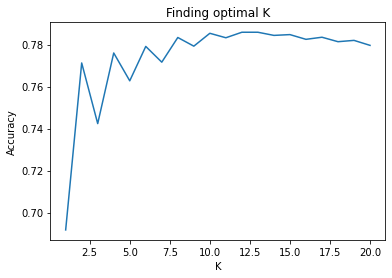

In [92]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

In [93]:
# From above diagram, found optimal K(n_neighbors)=10 (the best Accuracy point)
model = KNeighborsClassifier(n_neighbors=10)

# k-fold cross_validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_scaled,y,cv=4,scoring='precision')
scores.mean()

0.6715927331202751

In [94]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8125

In [95]:
y_pred = model.predict(X_test)

- Performance metrics for KNN Classification:

In [96]:
# Model performance measures
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
tpr = recall_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1476
           1       0.73      0.45      0.56       524

    accuracy                           0.81      2000
   macro avg       0.78      0.70      0.72      2000
weighted avg       0.80      0.81      0.80      2000



##### - Adaboost Classification

In [97]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
parameters = {'n_estimators': (1, 2, 3),
              'base_estimator__max_depth': (1, 2, 3),
              'algorithm': ('SAMME', 'SAMME.R')}
clf = GridSearchCV(boost, parameters)

In [98]:
clf.fit(X_scaled,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1

In [99]:
clf.best_params_

{'algorithm': 'SAMME.R', 'base_estimator__max_depth': 3, 'n_estimators': 3}

In [100]:
clf.best_score_

0.84275

In [101]:
# Upon above Hyperparameter tuning, we find the optimal model parameters = 
# {'algorithm': 'SAMME.R', 'base_estimator__max_depth': 3, 'n_estimators': 3}
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=3,algorithm='SAMME.R',random_state=0)

# k-fold cross_validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada,X_scaled,y,cv=4,scoring='precision')
scores.mean()

0.7033574506387295

In [102]:
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.837

In [103]:
# predict the model with test set
y_pred = ada.predict(X_test)

- Performance metrics for Adaboost Classification:

In [104]:
# Adaboost classification model performance measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
tpr = recall_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1476
           1       0.72      0.63      0.67       524

    accuracy                           0.84      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.83      0.84      0.83      2000



##### - Random Forest Classification

In [105]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
param_dict = {'n_estimators': (50, 100, 150),
              'max_depth': (1, 2, 3, 4, 5),
              'criterion': ('gini', 'entropy')
              }

clf = GridSearchCV(RandomForestClassifier(),param_dict,cv=4)

In [106]:
clf.fit(X_scaled,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [107]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [108]:
clf.best_score_

0.827125

In [121]:
# Upon above Hyperparameter tuning, it derived the optimal RandomForestClassifier model parameters = 
# {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
rfc = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=5,criterion='gini')

# k-fold cross_validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_scaled,y,cv=4,scoring='precision')
scores.mean()

0.8263046406301985

In [122]:
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.82

In [123]:
# predict the model with test set
y_pred = rfc.predict(X_test)

- Performance metrics for Random Forest Classification:

In [124]:
# Random Forest classification model performance measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
tpr = recall_score(y_test, y_pred, average='weighted')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1476
           1       0.85      0.38      0.52       524

    accuracy                           0.82      2000
   macro avg       0.83      0.68      0.71      2000
weighted avg       0.83      0.82      0.79      2000



##### - SVM (Support Vector Machine) Classification

In [113]:
# Hyperparameter tuning using GridSearchCV
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

#param_dict ={
#                'kernel': ['linear','poly','rbf'],
#                'degree': [2,3],
#                'gamma': [0.01, 0.1, 1],
#                'C': [0.1, 1, 10]
#                }
#clf = GridSearchCV(SVC(),param_dict,cv=4)

In [114]:
#clf.fit(X_scaled,y)

In [115]:
#clf.best_params_

In [116]:
#.best_score_

In [117]:
# Upon Hyperparameter tuning, we use the derived optimal SVM Classifier model parameters = 
# {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'} to train model
#svm = SVC(kernel='rbf',gamma=0.01,degree=2,C=10)
#svm.fit(X_train,y_train)
#svm.score(X_test,y_test)

In [118]:
# predict the model with test set
#y_pred_svm=svm.predict(X_test)

- Performance metrics for SVM Classification:

In [119]:
# SVM classification model performance measures
#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#from sklearn.metrics import classification_report, f1_score
#cm = confusion_matrix(y_test, y_pred_svm)
#accuracy = accuracy_score(y_test, y_pred_svm)
#precision = precision_score(y_test, y_pred_svm, average='weighted') 
#tpr = recall_score(y_test, y_pred_svm, average='weighted')
#print(classification_report(y_test, y_pred_svm))